In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from scipy.optimize import curve_fit
import warnings
import json
from wafer_plot import draw_wafer_plot

warnings.filterwarnings('ignore')

In [2]:
root_path = Path('/Users/jiahaozhan/Google Drive/Other Computers/CM300/Dione_wafer3_BO')
data_path = root_path / 'pdk_detector_highspeed_test_cells_30C'

dark_curr = {}
photo_curr = {}
device_no = 0

df_ref = pd.read_json(data_path / 'reticle0' / 'pdk_detector_highspeed_test_cells.json')
data_dir_gen = sorted(data_path.glob(f'reticle*/*.json'))
for d in data_dir_gen:
    df = pd.read_json(d)
    ret = df['reticle'][0]
    dark_curr[ret], photo_curr[ret] = df['smu_current'][device_no][0], df['smu_current'][device_no][1]

volts = [0, 0.3, 0.6, 0.9, 1.1]
print(df_ref.columns)

Index(['Unnamed: 0', 'test_cell', 'device_no', 'device', 'position',
       'ge_width', 'l_taper', 'reticle', 'power_ch1_mW', 'laser_power',
       'smu_voltage', 'smu_current', 'chuck_temperature', 'date'],
      dtype='object')


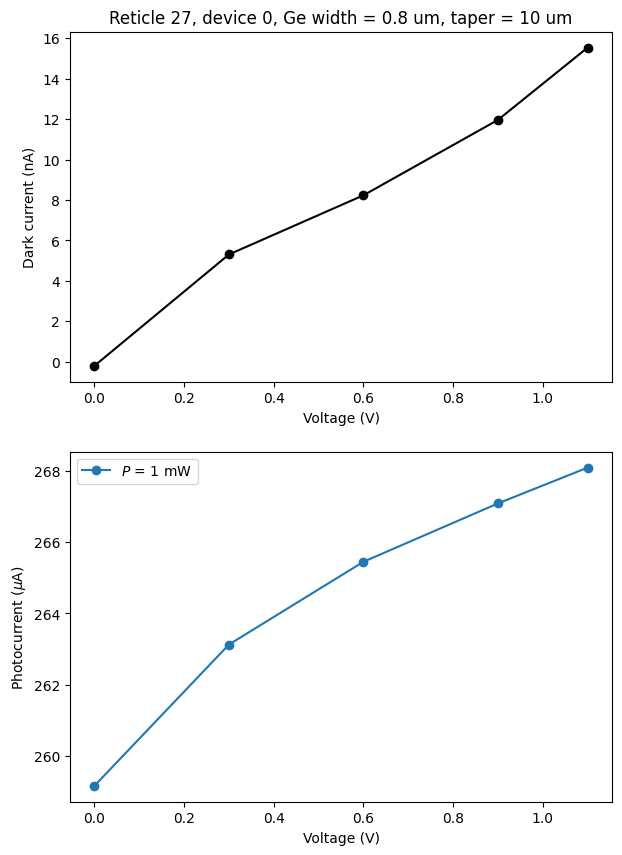

In [3]:
# Plot the current data
ret = 27
ge_w = df_ref['ge_width'][device_no]
taper_l = df_ref['l_taper'][device_no]

fig, axes = plt.subplots(2, 1, figsize=(7, 10))
ax = axes[0]
ax.plot(volts, np.multiply(dark_curr[ret], 1000), 'o-', color='k')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Dark current (nA)')
ax.set_title(f'Reticle {ret}, device {device_no}, Ge width = {ge_w} um, taper = {taper_l} um')
ax = axes[1]
ax.plot(volts, photo_curr[ret], 'o-', label='$P$ = 1 mW')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Photocurrent ($\mu$A)')
ax.legend()

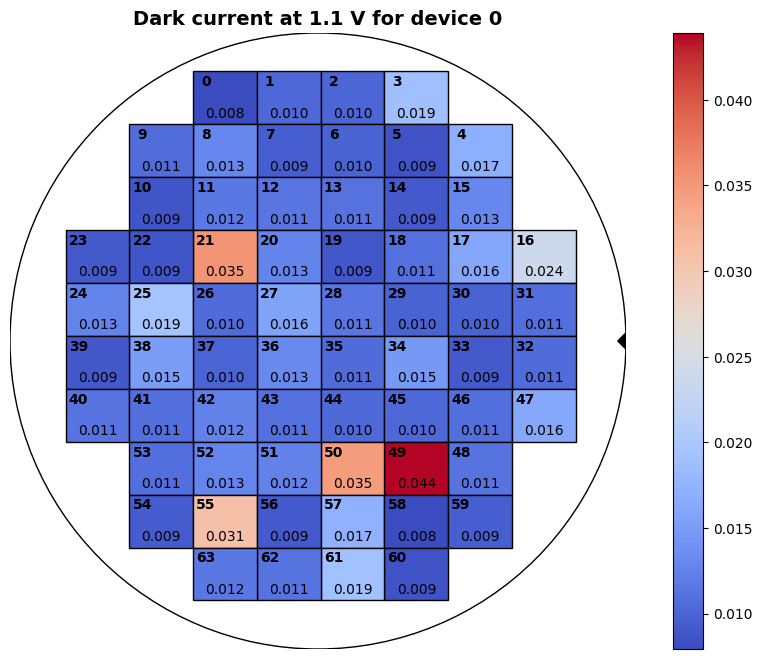

In [4]:
# get a wafer plot
dark_curr_1p1V = {ret:dc[-1] for ret, dc in dark_curr.items()}
draw_wafer_plot(data=dark_curr_1p1V, title='Dark current at 1.1 V for device 0')

In [ ]:
|